In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [91]:
diabetes = load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [92]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['TARGET'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,TARGET
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [93]:
X_train,X_test,y_train,y_test = train_test_split(diabetes.data,diabetes.target,test_size=0.2,random_state=2)

### 1. How coefficients are affected by L1 Regularization?

In [94]:
coefficients = []
r2_scores = []

alphas = [0, 0.01, 0.1, 0.5, 1, 10]

for i in alphas:
    lasso = Lasso(alpha=i)
    lasso.fit(X_train, y_train)

    coefficients.append(lasso.coef_.tolist())
    y_pred = lasso.predict(X_test)
    r2_scores.append(r2_score(y_test, y_pred))

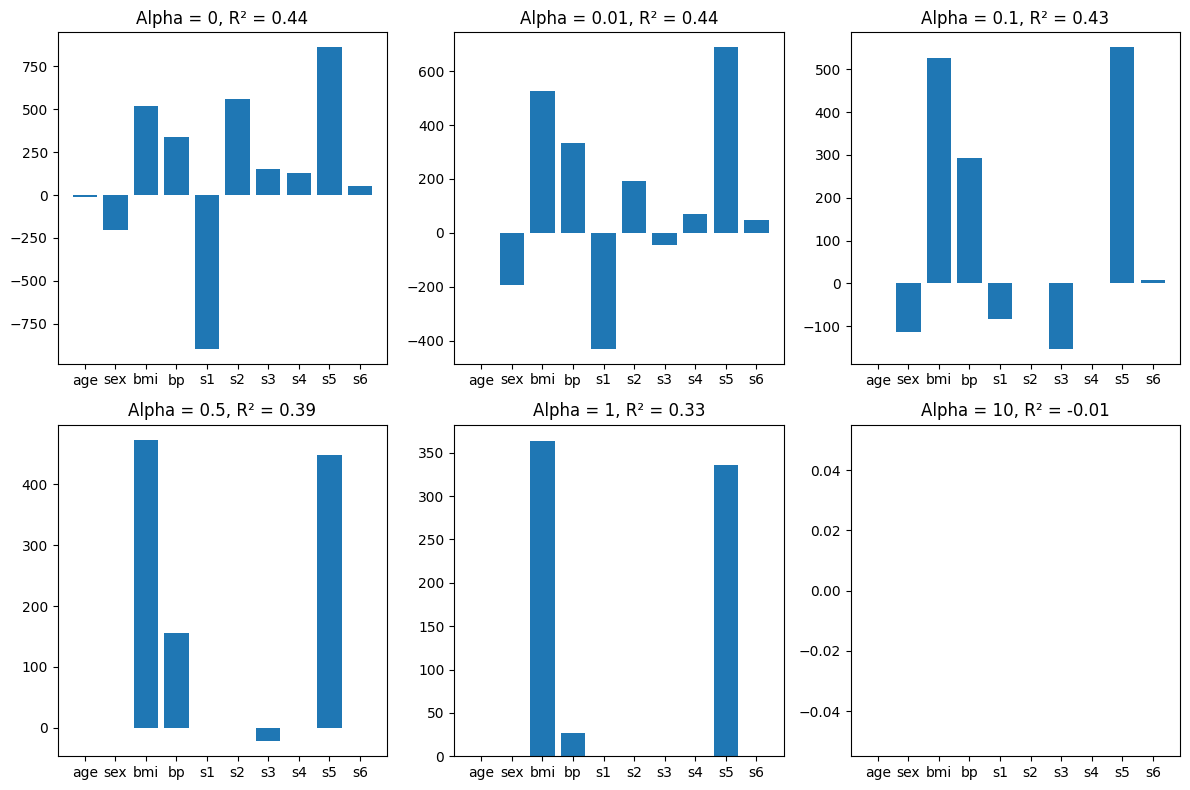

In [95]:
plt.figure(figsize=(12, 8))

for i in range(len(alphas)):
    plt.subplot(2, 3, i + 1)
    plt.bar(diabetes.feature_names, coefficients[i])
    plt.title(f'Alpha = {alphas[i]}, R² = {round(r2_scores[i], 2)}')

plt.tight_layout()
plt.show()


Here. It is clearly seen that when we are increasing the value of $\lambda$ or $\alpha$ the values of coefficients are decreasing and ultimately becoming zero.

### 2. Higher Coefficients are being affected more 

In [96]:
alphas = [0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
coefficients = []

for i in alphas:
    reg = Lasso(alpha=i)
    reg.fit(X_train,y_train)
    
    coefficients.append(reg.coef_.tolist())

In [97]:
coefficients_array = np.array(coefficients)

In [98]:
coefficients_df = pd.DataFrame(coefficients_array, columns=diabetes.feature_names)
coefficients_df['alpha'] = alphas
coefficients_df.set_index('alpha')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.0000,-9.158653,-205.454322,516.693745,340.619999,-895.551989,561.220669,153.893104,126.731395,861.126997,52.421122
0.0001,-9.069064,-205.329406,516.789418,340.532379,-888.660904,555.958584,150.593655,125.450143,858.645541,52.380294
0.0010,-8.262770,-204.205364,517.650073,339.743901,-826.663603,508.617395,120.908607,113.921773,836.320753,52.012849
0.0100,-1.359721,-192.937180,526.356514,332.641101,-430.226975,191.295480,-44.034913,68.988987,688.396028,47.940616
0.1000,0.000000,-113.969928,526.744396,292.628472,-82.693681,-0.000000,-152.685338,0.000000,551.080291,7.170992
1.0000,0.000000,0.000000,363.885742,27.273163,0.000000,0.000000,-0.000000,0.000000,336.137262,0.000000
10.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
100.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
1000.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


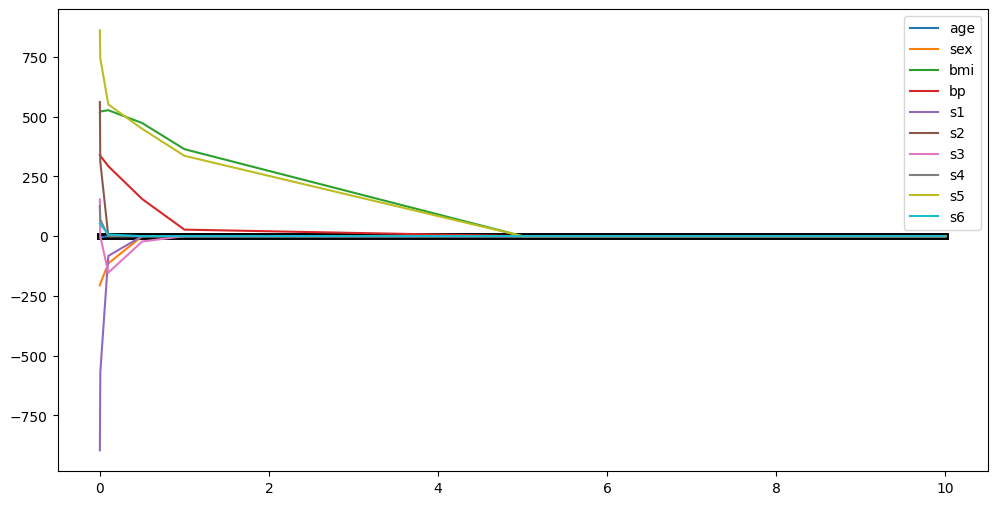

In [99]:
alphas = [0,0.0001,0.0005,0.001,0.005,0.1,0.5,1,5,10]
coefficients1 = []

for i in alphas:
    lasoo = Lasso(alpha=i)
    lasoo.fit(X_train, y_train)

    coefficients1.append(lasoo.coef_.tolist())

coefficients_array1 = np.array(coefficients1).T

plt.figure(figsize=(12,6))
plt.plot(alphas,np.zeros(len(alphas)),color='black',linewidth=5)
for i in range(coefficients_array1.shape[0]):
    plt.plot(alphas,coefficients_array1[i],label=diabetes.feature_names[i])
plt.legend()
plt.show()

### 3. Impact of Regularization on Loss Function

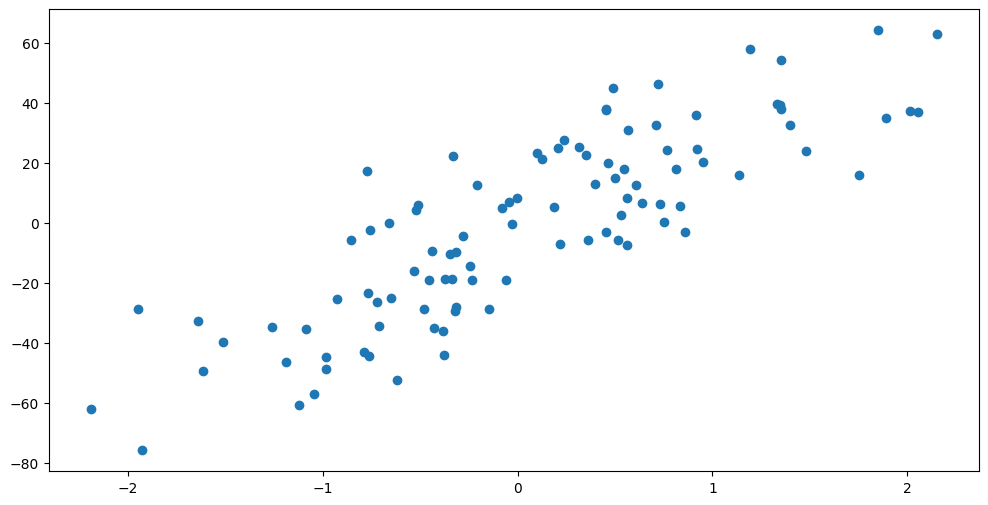

In [100]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)
plt.figure(figsize=(12, 6))
plt.scatter(X,y)

In [101]:
reg = LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)

[27.82809103]
-2.29474455867698


In [102]:
def cal_loss(m,alpha):
    return np.sum((y - m*X.ravel() + 2.29)**2) + alpha*abs(m)

In [103]:
def predict(m):
    return m*X - 2.29

Text(0, 0.5, 'Loss')

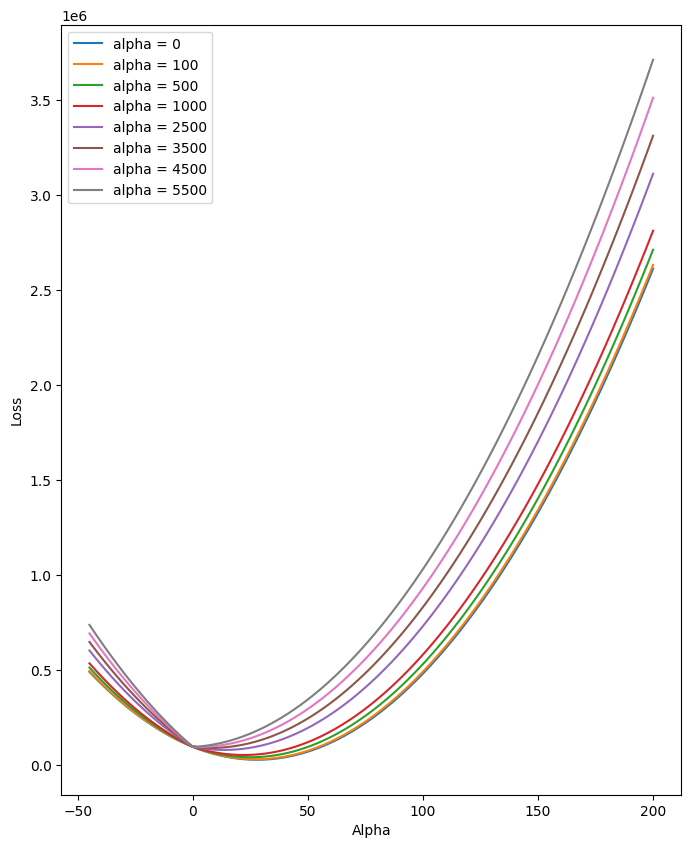

In [104]:
m = np.linspace(-45,200,100)

plt.figure(figsize=(8,10))
for j in [0,100,500,1000,2500,3500,4500,5500]:
    loss = []
    for i in range(m.shape[0]):
        loss_i = cal_loss(m[i],j)
        loss.append(loss_i)
    plt.plot(m,loss,label='alpha = {}'.format(j))

plt.legend()
plt.xlabel('Alpha')
plt.ylabel('Loss')